In [1]:
import sklearn.datasets as datasets
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
iris=datasets.load_iris()

df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

y=iris.target
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


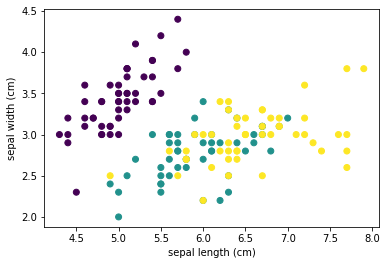

In [4]:
plt.scatter(df["sepal length (cm)"],df["sepal width (cm)"],c=iris.target)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

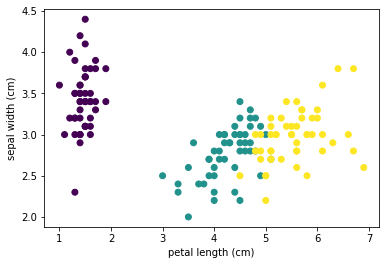

In [5]:
plt.scatter(df["petal length (cm)"],df["sepal width (cm)"],c=iris.target)
plt.xlabel("petal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

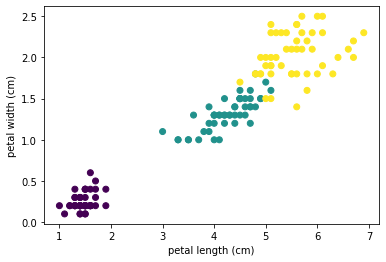

In [6]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"],c=iris.target)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.show()

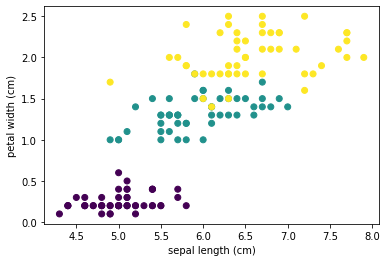

In [7]:
plt.scatter(df["sepal length (cm)"],df["petal width (cm)"],c=iris.target)
plt.xlabel("sepal length (cm)")
plt.ylabel("petal width (cm)")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


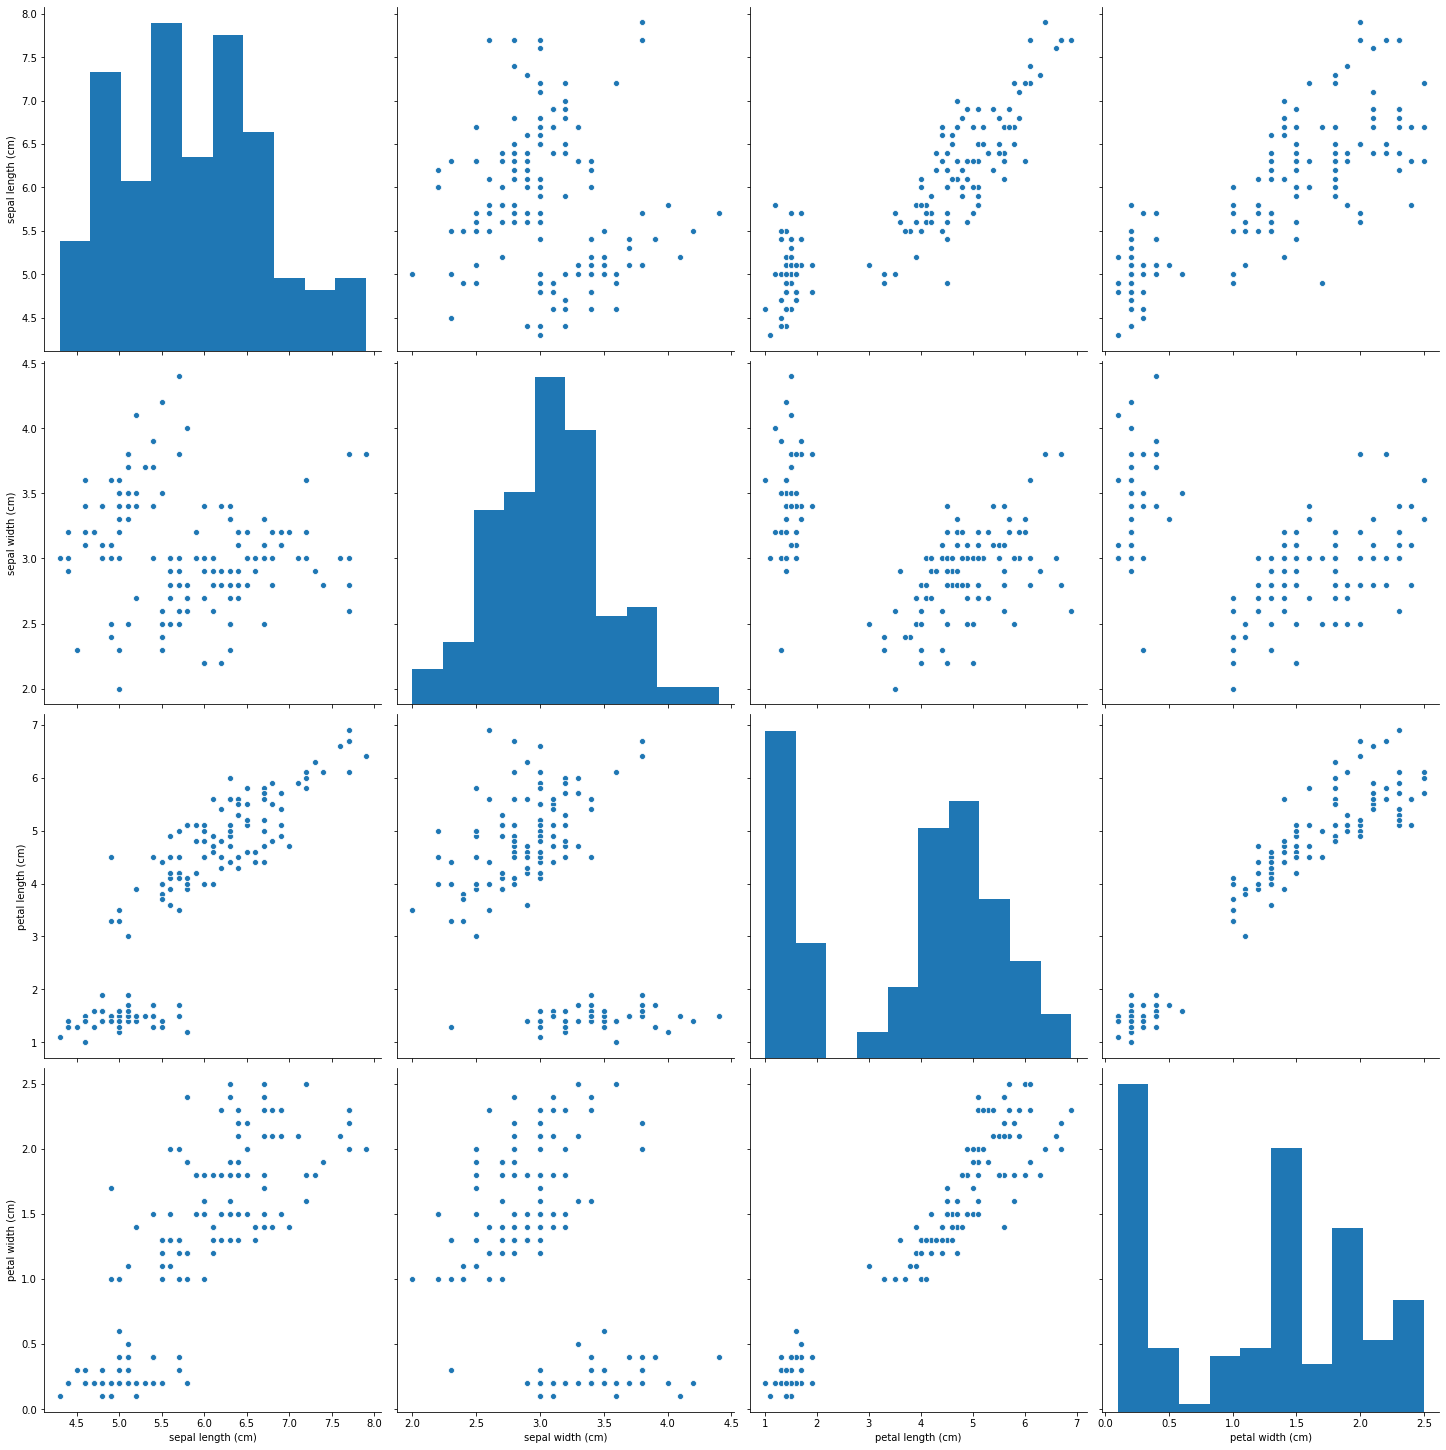

In [8]:
sns.pairplot(df,size=5)
plt.show()

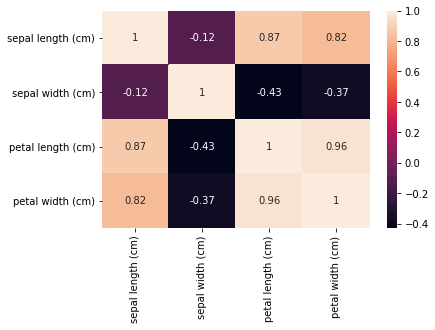

In [9]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [10]:
import scipy.stats as stats

for i in ["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]:
        j,pvalue = stats.normaltest(df[i])
        if(pvalue < 0.05):
#if the value is less then 0.05 then the distribution is not normal and our hypothesis are true.
            print("%s has a pvalue of %f - distribution is not normal"%(i,pvalue))
        else:
            print("%s has pvalue of %f"%(i,pvalue))

sepal length (cm) has pvalue of 0.056824
sepal width (cm) has pvalue of 0.209734
petal length (cm) has a pvalue of 0.000000 - distribution is not normal
petal width (cm) has a pvalue of 0.000000 - distribution is not normal


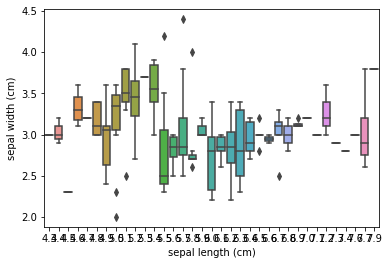

In [11]:
sns.boxplot(x='sepal length (cm)',y='sepal width (cm)',data=df)

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)

In [14]:
X = df.iloc[:,[0,1,2,3]].values

In [15]:
y_kmeans = kmeans.fit_predict(X)

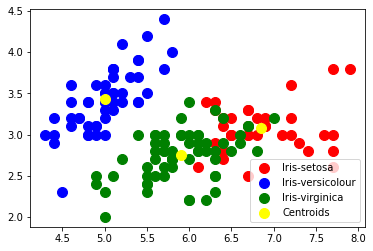

In [16]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [17]:
df = df.drop(['sepal width (cm)'],axis=1)

In [18]:
y= iris.target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2 ,random_state=42)

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=42, max_depth=4)
tree.fit(df,y)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [20]:
y_pred = tree.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


In [21]:
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


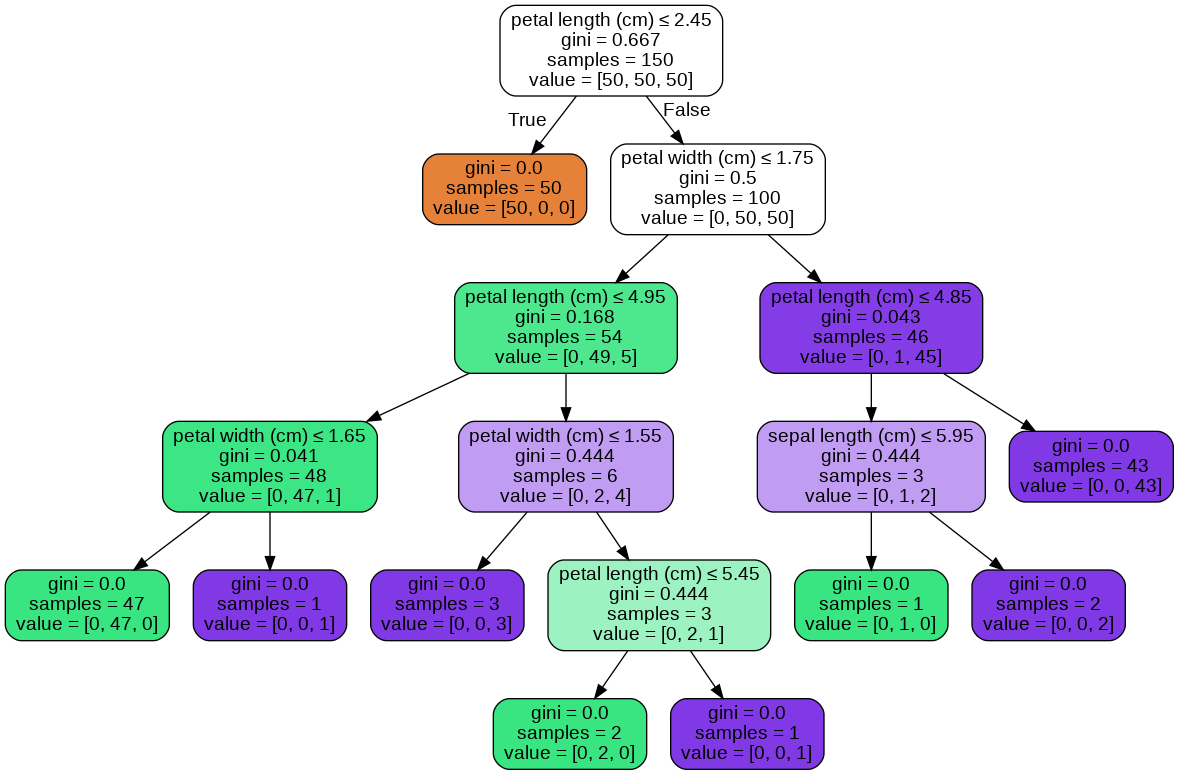

In [22]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

fn = ["sepal length (cm)","petal length (cm)","petal width (cm)"]
clf = DecisionTreeClassifier().fit(df[["sepal length (cm)","petal length (cm)","petal width (cm)"]], y)
dot_data = export_graphviz(clf, out_file=None, feature_names=fn,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
image=graph.create_png()
graph.write_png("kmc_dt.png")
Image(filename="kmc_dt.png")